In [1]:
import pandas as pd
import numpy as np
import os
import scanpy as sc

#make pretty things
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/10x_analysis_7392-GD/Sample_7392-GD-1-GEX_TTATTCGAGG-AGCAGGACAG/filtered_feature_bc_matrix/"

# load the data
data = sc.read_10x_mtx(fpath)
print('done')

done


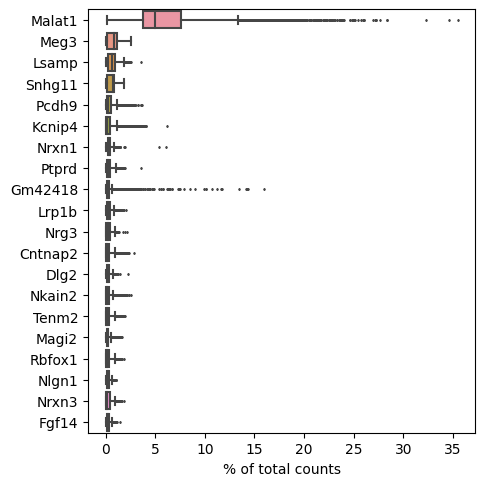

In [3]:
sc.pl.highest_expr_genes(data, n_top=20, )

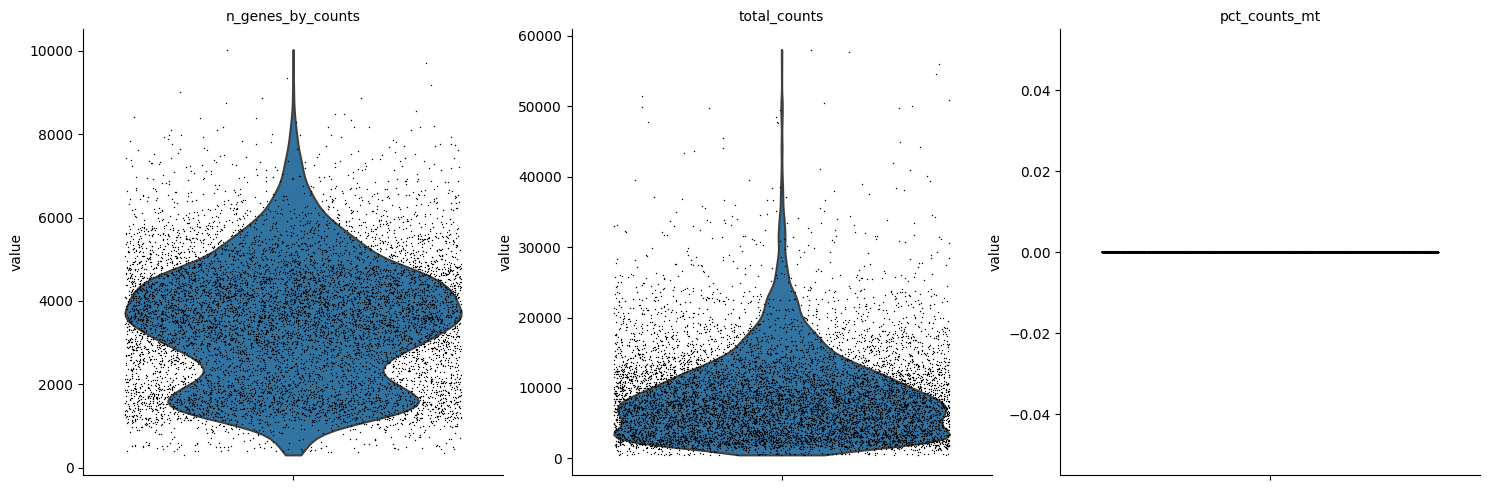

In [4]:
data.var['mt'] = data.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(data, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

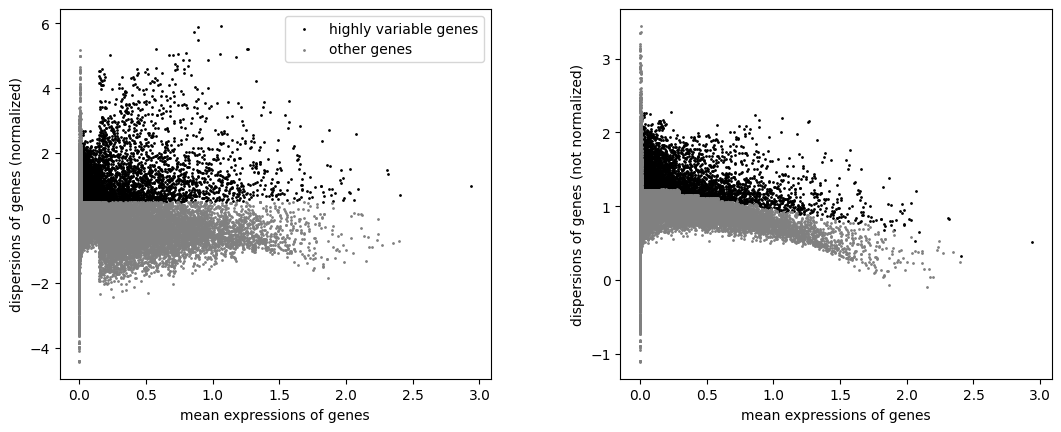

In [6]:
sc.pp.normalize_total(data, target_sum=1e4)
sc.pp.log1p(data)
sc.pp.highly_variable_genes(data, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(data)

In [8]:
sc.pp.neighbors(data, n_neighbors=10, n_pcs=40)
sc.tl.umap(data)


         Falling back to preprocessing with `sc.pp.pca` and default params.


2023-08-14 12:49:03.655369: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 12:49:11.521570: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-14 12:49:14.409519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-14 12:49:14.409560: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

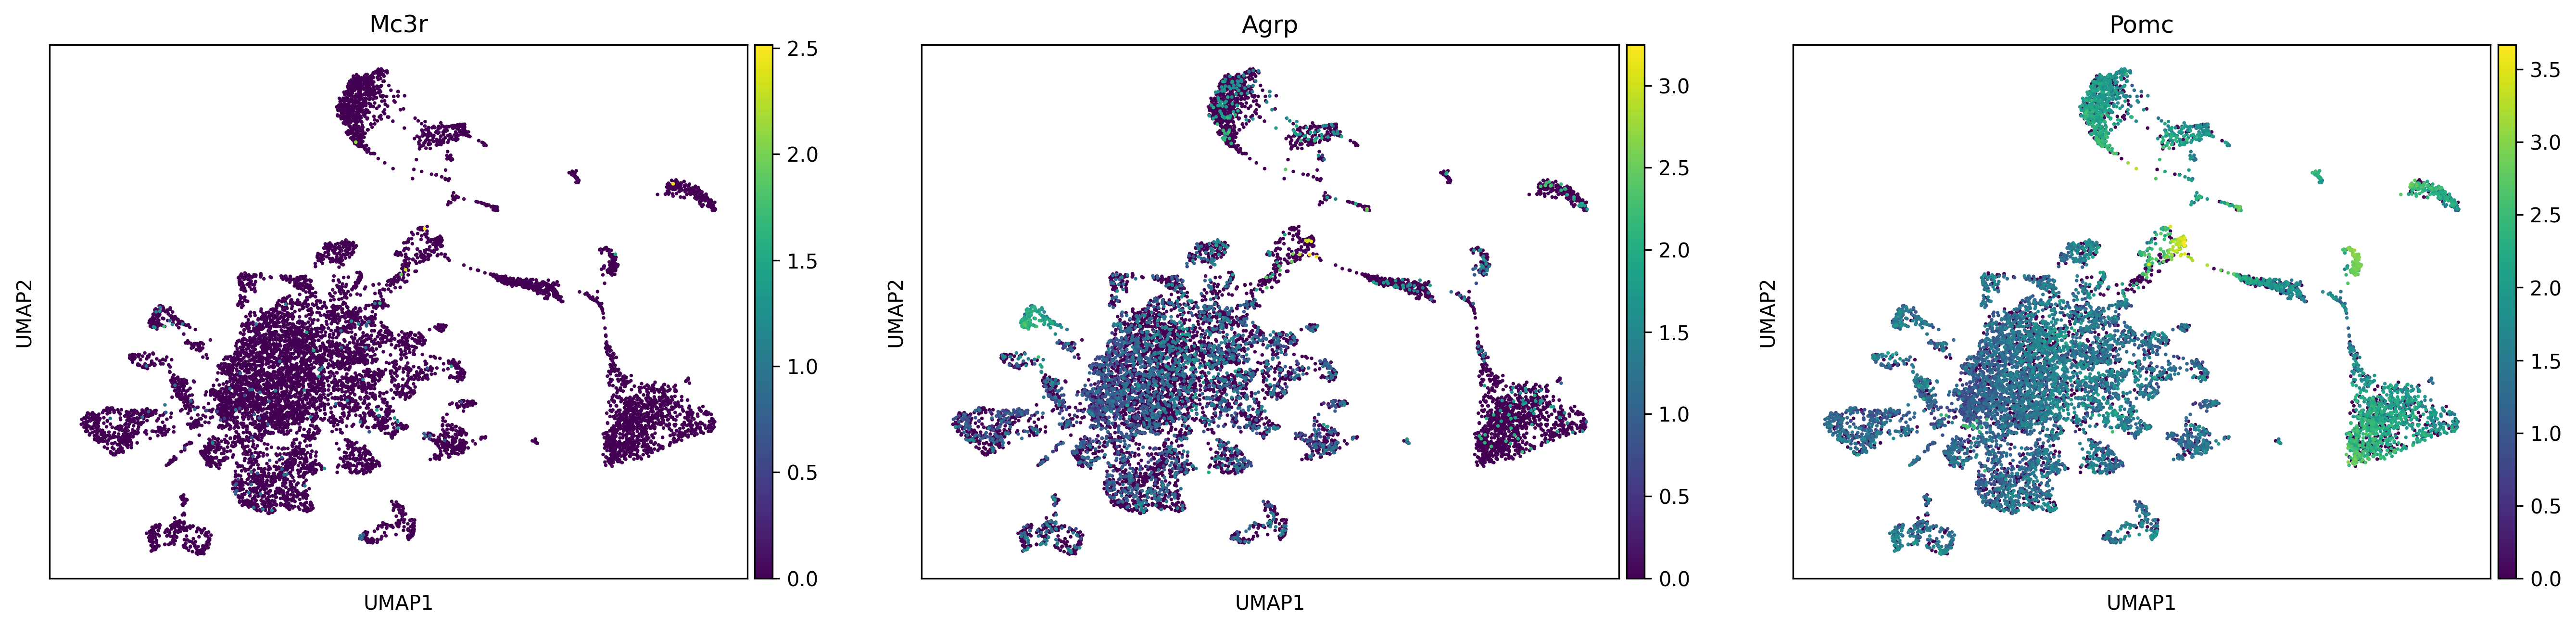

In [16]:
plt.rcParams['figure.dpi'] = 300
sc.pl.umap(data, color=['Mc3r', 'Agrp', 'Pomc'])

In [12]:
# data.var_names[0:10]

Index(['Xkr4', 'Gm1992', 'Gm19938', 'Gm37381', 'Rp1', 'Sox17', 'Gm37587',
       'Gm37323', 'Mrpl15', 'Lypla1'],
      dtype='object')